In [93]:
# run pip install python-dotenv
from dotenv import load_dotenv, find_dotenv

In [94]:
dotenv_path = find_dotenv()

load_dotenv(dotenv_path)

True

In [95]:
import os

In [96]:
KAGGLE_USERNAME = os.environ.get("KAGGLE_USERNAME")

In [97]:
KAGGLE_PASSWORD = os.environ.get("KAGGLE_PASSWORD")


In [98]:
print("KAGGLE USERNAME:{}  KAGGLE PASSWORD:{}".format(KAGGLE_USERNAME, KAGGLE_PASSWORD))

KAGGLE USERNAME:adarsh9780  KAGGLE PASSWORD:9780@maN


In [99]:
import urllib.request

In [100]:
# # create a password manager
password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()

# # Add the username and password.
# # If we knew the realm, we could use it instead of None.
top_level_url = "https://www.kaggle.com/c/3136/download-all"
password_mgr.add_password(None, top_level_url, KAGGLE_USERNAME, KAGGLE_PASSWORD)

handler = urllib.request.HTTPBasicAuthHandler(password_mgr)

# # create "opener" (OpenerDirector instance)
opener = urllib.request.build_opener(handler)

# # use the opener to fetch a URL
opener.open("https://www.kaggle.com/c/3136/download-all")

# # Install the opener.
# # Now all calls to urllib.request.urlopen use our opener.
urllib.request.install_opener(opener)

## Exploratry Data Analysis

In [101]:
import pandas as pd
import numpy as np
import os

## import Data

In [102]:
raw_data_path = os.path.join(os.pardir, 'data', 'raw')
train_data_path = os.path.join(raw_data_path, 'train.csv')
test_data_path = os.path.join(raw_data_path, 'test.csv')

In [103]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [104]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [108]:
# add a column named Survived in test_df
test_df['Survived'] = -1

In [109]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [110]:
# create a new df
# axis = 0 --> join the second below first, ROW WISE
# axis = 1 --> join the second along first, COLUMN WISE
df = pd.concat((train_df, test_df), axis=0)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [112]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [113]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [114]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,-1,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,-1,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,-1,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,-1,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,-1,2668


In [115]:
df.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
408,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,-1,334915
409,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,1301,3,female,1,-1,SOTON/O.Q. 3101315
410,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,-1,365237
411,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,-1,19928
412,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,-1,347086
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,-1,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,-1,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,-1,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,-1,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,-1,2668


## Indexing & Filtering

In [116]:
# Selection
# can also be done using df.Name
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [117]:
# more than one columns
df[['PassengerId', 'Name']]

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
5,6,"Moran, Mr. James"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,"Nasser, Mrs. Nicholas (Adele Achem)"


In [118]:
# filtering: find total number of male

male_passenger = df.loc[df['Sex'] == 'male', :]

print("No. male passenger is : {0}".format(len(male_passenger)))

No. male passenger is : 843


In [119]:
# use operators like & or |

mp_grtr_45 = df.loc[(df['Sex']=='male') & (df['Age']>45)]

print("Male passenger greater than 45 : {0}".format(len(mp_grtr_45)))

Male passenger greater than 45 : 103


In [120]:
# find teenagers
children = df.loc[(df['Age']<18)]

print("Male passenger less than 18 : {0}".format(len(children)))

Male passenger less than 18 : 154


In [121]:
# indexing: slicing works
df.iloc[4:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [122]:
# 5 is interpreted as label not an index
train_df.loc[5:10,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


## Summary Statistics

In [123]:
df.mean()

Age             29.881138
Fare            33.295479
Parch            0.385027
PassengerId    655.000000
Pclass           2.294882
SibSp            0.498854
Survived        -0.058060
dtype: float64

In [124]:
df.median()

Age             28.0000
Fare            14.4542
Parch            0.0000
PassengerId    655.0000
Pclass           3.0000
SibSp            0.0000
Survived         0.0000
dtype: float64

In [125]:
df['Age'].median()

28.0

In [126]:
df.var()

Age               207.748787
Fare             2678.959738
Parch               0.749195
PassengerId    142899.166667
Pclass              0.701969
SibSp               1.085052
Survived            0.577666
dtype: float64

In [127]:
df.std()

Age             14.413493
Fare            51.758668
Parch            0.865560
PassengerId    378.020061
Pclass           0.837836
SibSp            1.041658
Survived         0.760044
dtype: float64

In [128]:
df['Age'].max()-df['Age'].min()

79.83

In [129]:
# or you can use a shortcut
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,-0.058060
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.760044
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,-1.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [130]:
df["Age"].quantile(.25)

21.0

In [131]:
df["Age"].quantile(.5)

28.0

In [132]:
df["Age"].quantile(.75)

39.0

In [133]:
df["Age"].quantile(1)

80.0

In [134]:
df["Age"].quantile(0)

0.17

In [135]:
%matplotlib inline

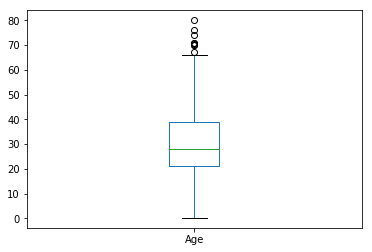

In [136]:
df['Age'].plot(kind='box')

## Summary Statistics for Categorical features

In [137]:
# previosly describe method only includes numerical value
# to also include categorical values pass a parameter include
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,-0.058060,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.760044,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,-1.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,-1.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [138]:
# categorical columns
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [139]:
# categorical columns
df['Sex'].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [140]:
df[df['Survived']!=-1].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [141]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

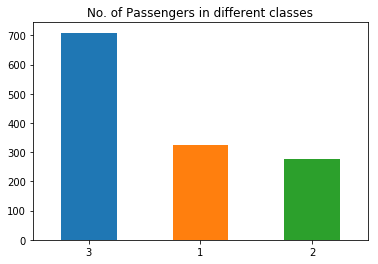

In [142]:
# Semi colon at the end suppress matplotlib output
df.Pclass.value_counts().plot(kind='bar', rot=0, title="No. of Passengers in different classes");

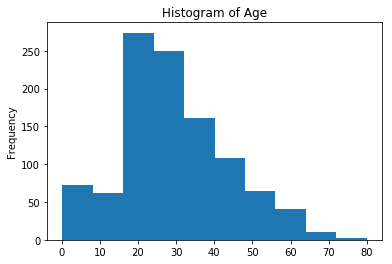

In [143]:
# histograms with default bins
# it neglects all the missing value
df.Age.plot(kind='hist', title='Histogram of Age');

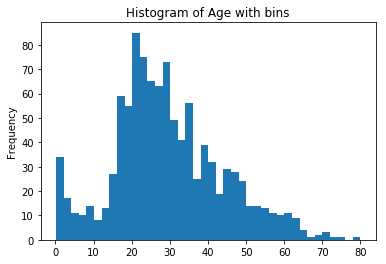

In [144]:
# histogram with bins
df.Age.plot(kind='hist', title="Histogram of Age with bins", bins=40)

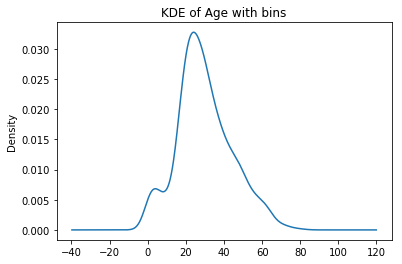

In [145]:
# Kernel density plot
df.Age.plot(kind='kde', title="KDE of Age with bins")

In [146]:
# calculate skewness
print("Skewness in age is : {0}".format((df.Age.skew())))

Skewness in age is : 0.40767455974362266


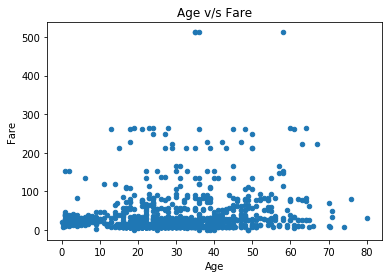

In [147]:
# Scatter plot
df.plot.scatter(x='Age', y='Fare', title="Age v/s Fare")

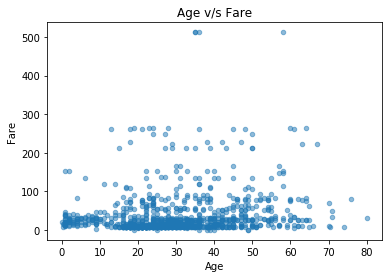

In [148]:
# Scatter plot
df.plot.scatter(x='Age', y='Fare', title="Age v/s Fare", alpha=0.5)

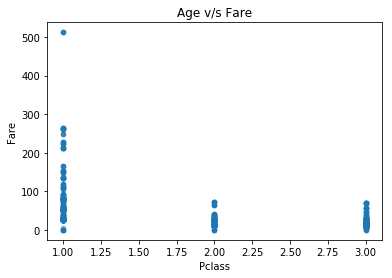

In [149]:
# Scatter plot
df.plot.scatter(x='Pclass', y='Fare', title="Age v/s Fare", alpha=0.5)

## Grouping(Aggregation) 

In [150]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [151]:
df.groupby(['Sex', 'Pclass'])['Age', 'Fare'].mean()

Age        Fare
Sex    Pclass                       
female 1       37.037594  109.412385
       2       27.499223   23.234827
       3       22.185329   15.324250
male   1       41.029272   69.888385
       2       30.815380   19.904946
       3       25.962264   12.415462

In [152]:
# Calculate mean for fare but median for age
aggregations = {
    "Fare":'mean',
    "Age" : "median",
}

df.groupby(['Sex', 'Pclass'])['Age', 'Fare'].agg(aggregations)

Fare   Age
Sex    Pclass                  
female 1       109.412385  36.0
       2        23.234827  28.0
       3        15.324250  22.0
male   1        69.888385  42.0
       2        19.904946  29.5
       3        12.415462  25.0

In [153]:
# More Complex aggregations
aggregations = {
    "Fare" : {
        'mean_fare':'mean',
        'max_fare': 'max',
        'min_fare': 'min',
    },
    "Age" : {
        'mean_age':'mean',
        'max_age':'max',
        'min_age':'min',
    }
}

df.groupby(['Sex', 'Pclass'])['Age', 'Fare'].agg(aggregations)

/home/adarsh/miniconda3/envs/DataScience/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


mean_fare  max_fare  min_fare   mean_age  max_age  min_age
Sex    Pclass                                                             
female 1       109.412385  512.3292     25.70  37.037594     76.0     2.00
       2        23.234827   65.0000     10.50  27.499223     60.0     0.92
       3        15.324250   69.5500      6.75  22.185329     63.0     0.17
male   1        69.888385  512.3292      0.00  41.029272     80.0     0.92
       2        19.904946   73.5000      0.00  30.815380     70.0     0.67
       3        12.415462   69.5500      0.00  25.962264     74.0     0.33

In [154]:
# Cross Tab
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


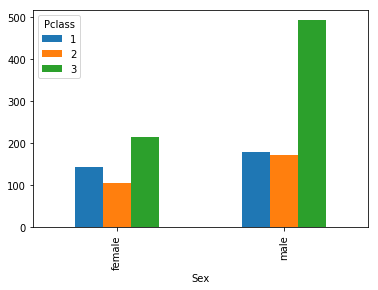

In [155]:
# Cross Tab
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

## Pivot Table

In [156]:
df.pivot_table(index="Sex", columns="Pclass", values="Age", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [157]:
# pivot table can also be generated using groupby and unstack function
df.groupby(["Sex", "Pclass"]).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [158]:
df.groupby(["Sex", "Pclass"]).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging

### Treating Missing Values

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


In [160]:
# extract the embarked columns having null values
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [161]:
# find most common embarkment point
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [162]:
pd.crosstab(train_df.Embarked, train_df.Survived,)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [163]:
pd.crosstab(train_df.Embarked, train_df.Survived, normalize=True)

Survived,0,1
Embarked,,
C,0.084364,0.104612
Q,0.052868,0.033746
S,0.480315,0.244094


In [164]:
# fill missing values
# Method-1 
# df.Embarked.fillna('S', inplace=True)

In [170]:
# Method-2
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'

In [177]:
# Both passengers paid 80 units, and both belongs to the same; Pclass=1,
# find the embarkment point in Pclass=1 which has fare close to 80
df[df.Pclass == 1].groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
Name: Fare, dtype: float64

In [174]:
# The above result shows that Pclass 1 with Emabarkment point C has closest fare to 80
df.Embarked.fillna('C', inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


## Fill missing value in Fare

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


In [184]:
# extract the fare having null value
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-1,3701


In [188]:
# this male passenger belongs to class 3,
# find the median price of class 3
df[df.Pclass==3].Fare.median()

8.05

In [191]:
# replace it with median price
df.loc[df.Fare.isnull(), 'Fare'] = '8.05'

In [195]:
df[df.Age == 60.5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,8.05,"Storey, Mr. Thomas",0,1044,3,male,0,-1,3701


## Fill Cabin